### Problem Statement: 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Evaluation:
Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

In [37]:
# !pip install statsmodels
# !pip install xgboost
# !pip install optuna


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Reading the dataset provided

In [39]:
train_data = pd.read_csv("train_v9rqX0R.csv")
test_data = pd.read_csv("train_v9rqX0R.csv")

In [40]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
print("Shape of dataframe:", train_data.shape)
print("Columns:", train_data.columns)



Shape of dataframe: (8523, 12)
Columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [43]:
# Check for duplicates
duplicates = train_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


In [44]:
#checking for duplicates in id
print(train_data.Item_Identifier.nunique())
print(train_data.Outlet_Identifier.nunique())

1559
10


In [45]:
#check data types
print("Data Types:", train_data.dtypes)

Data Types: Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [46]:
# Separate categorical and numerical columns
cat_df = train_data.select_dtypes(include=['object', 'category'])  # Categorical columns
num_df = train_data.select_dtypes(include=['int64', 'float64'])    # Numerical columns

In [47]:
# basic statistics of numeric variables
print("Basic Statistics:", num_df.describe())

Basic Statistics:        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


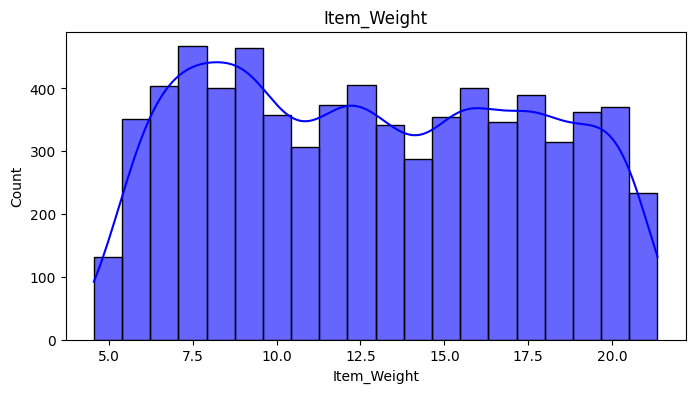

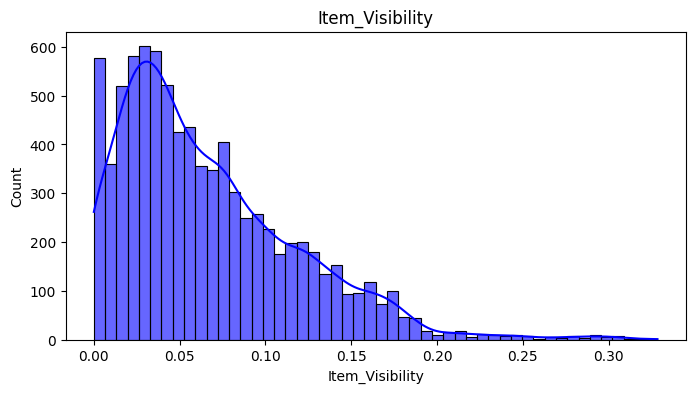

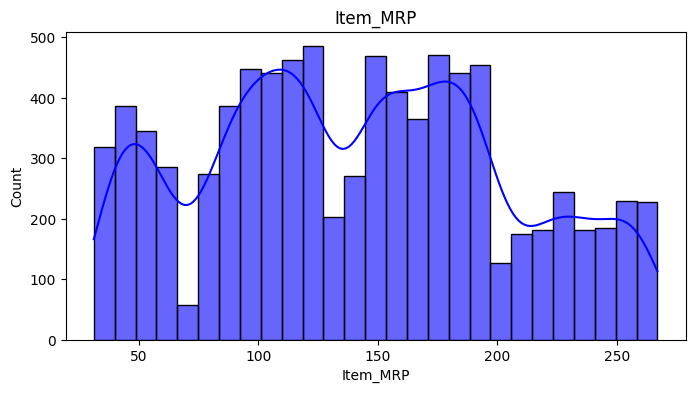

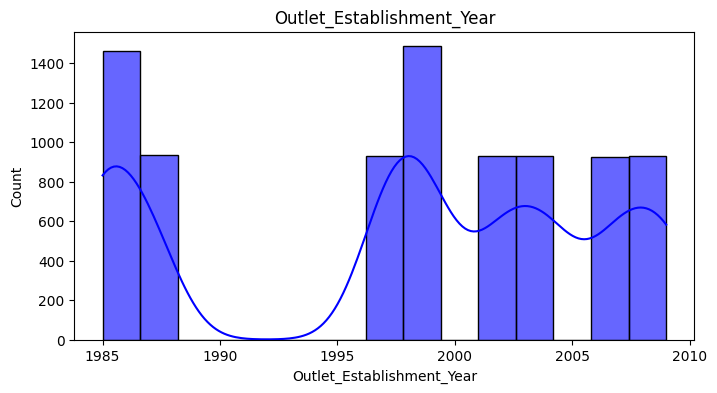

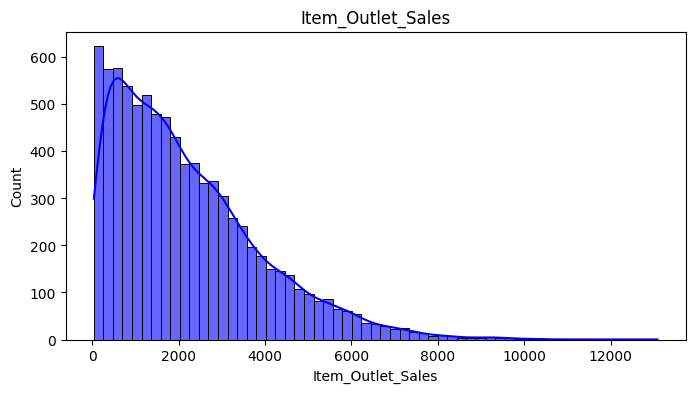

In [48]:
### Numerical Features
for col in num_df:
    plt.figure(figsize=(8,4))
    sns.histplot(train_data[col], kde=True, color='blue', alpha=0.6)
    plt.title(col)
    plt.show()

Observation:
"Item_Outlet_Sales" is highly right skewed. 

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


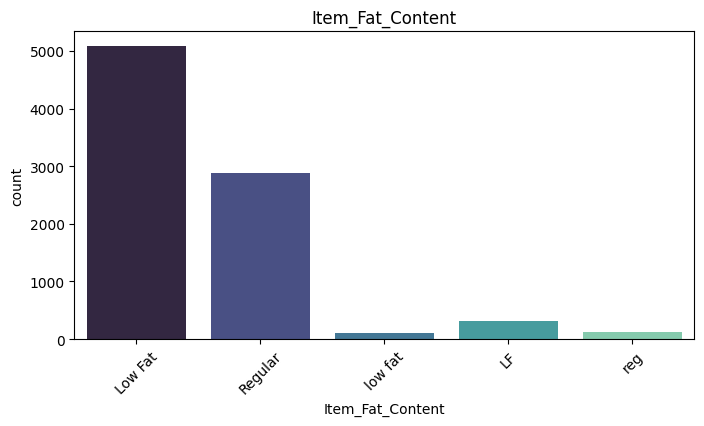

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


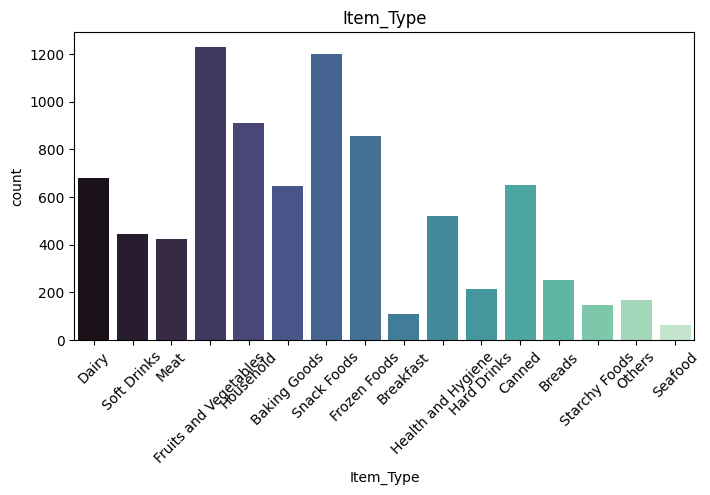

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


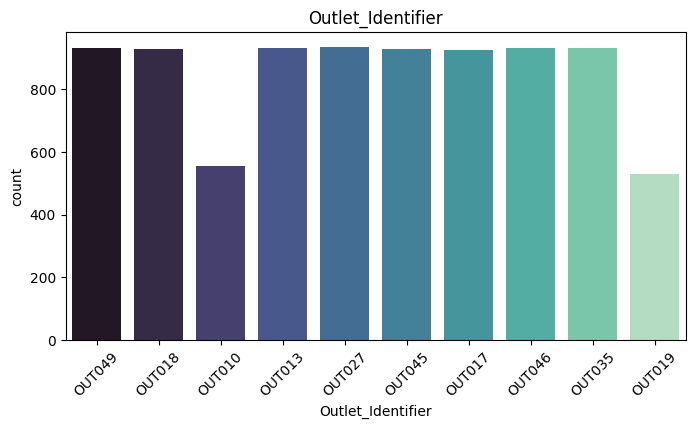

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


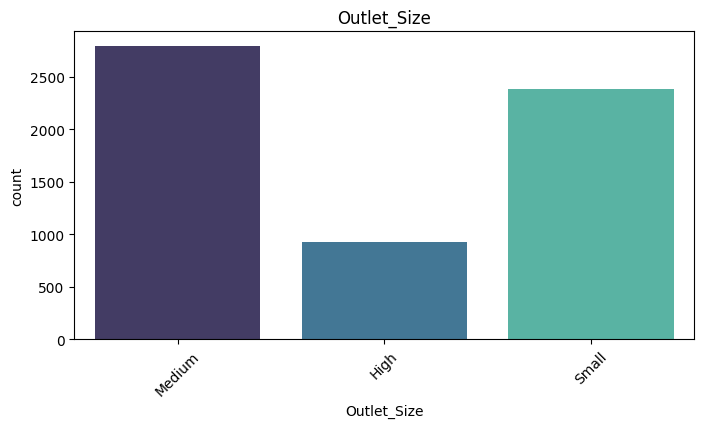

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


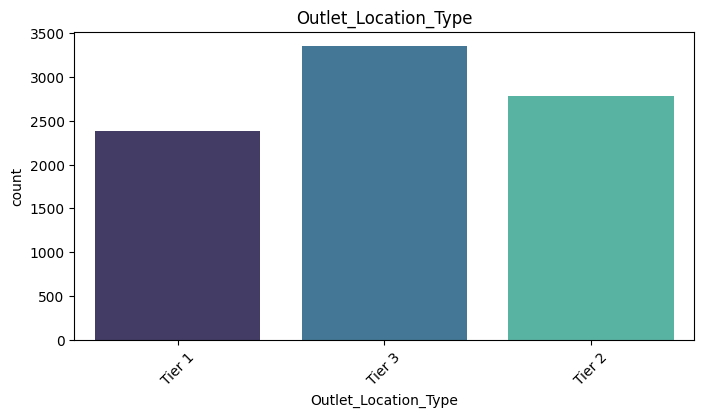

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\513084632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_data, palette='mako')


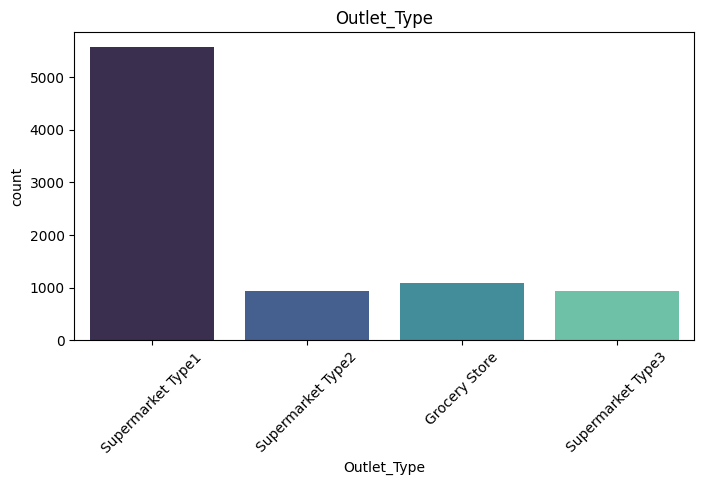

In [49]:
### Categorical Features

for col in cat_df:
    if col!='Item_Identifier':
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=train_data, palette='mako')
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show()

Observation:


Need to clean Item_Fat_Content column

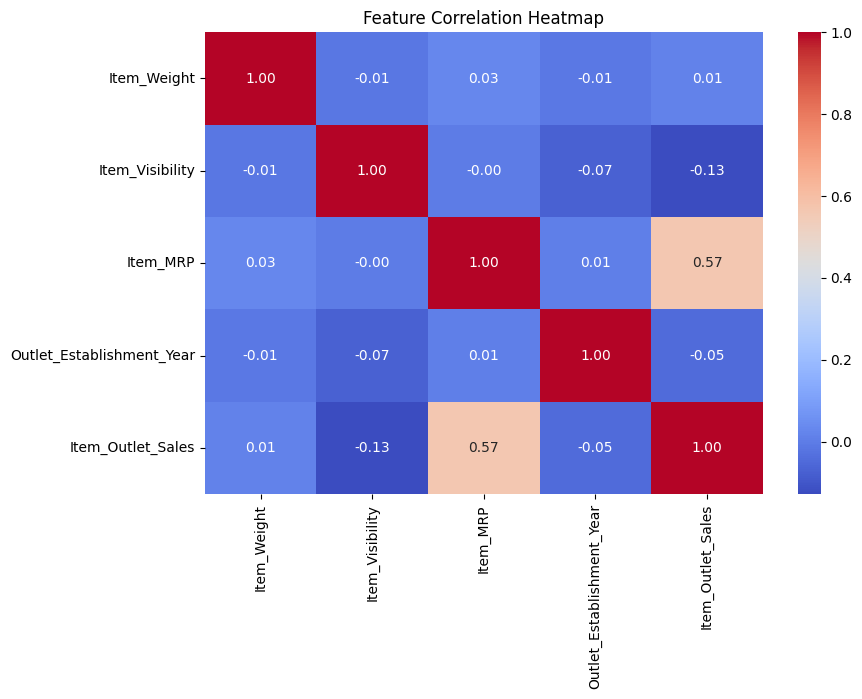

In [50]:
# Correlation Matrix of numeric variables
plt.figure(figsize=(9, 6))
sns.heatmap(num_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

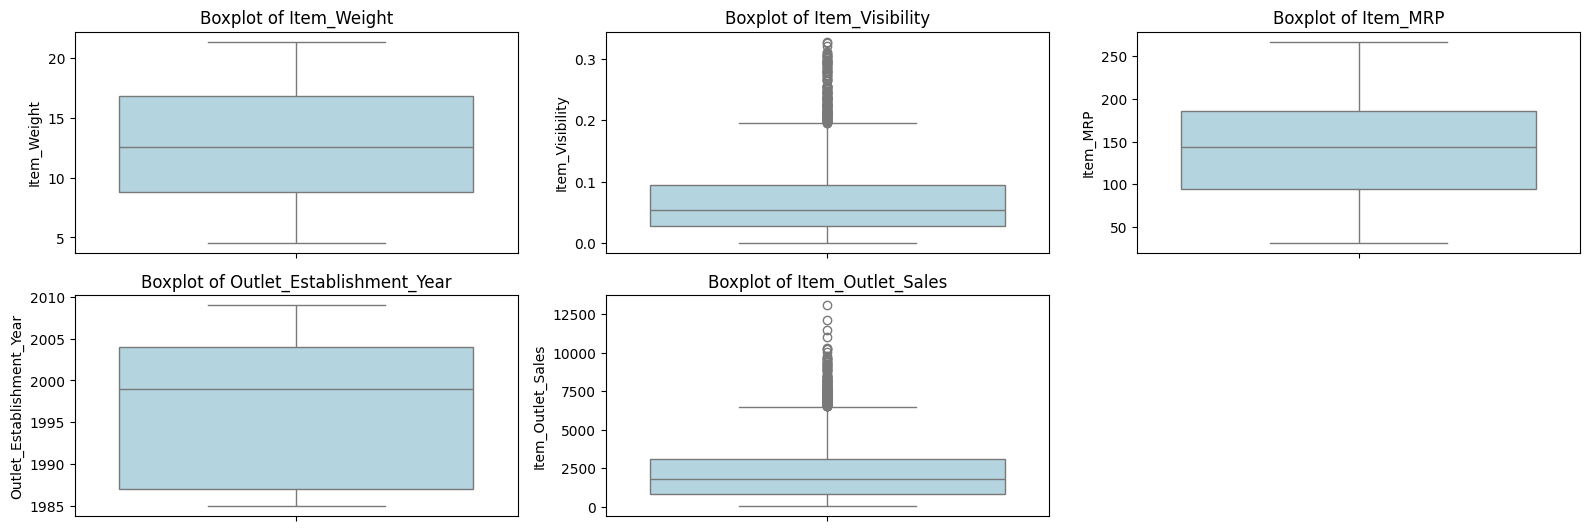

In [ ]:

plt.figure(figsize=(16,8))

for i, col in enumerate(num_df, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_data[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


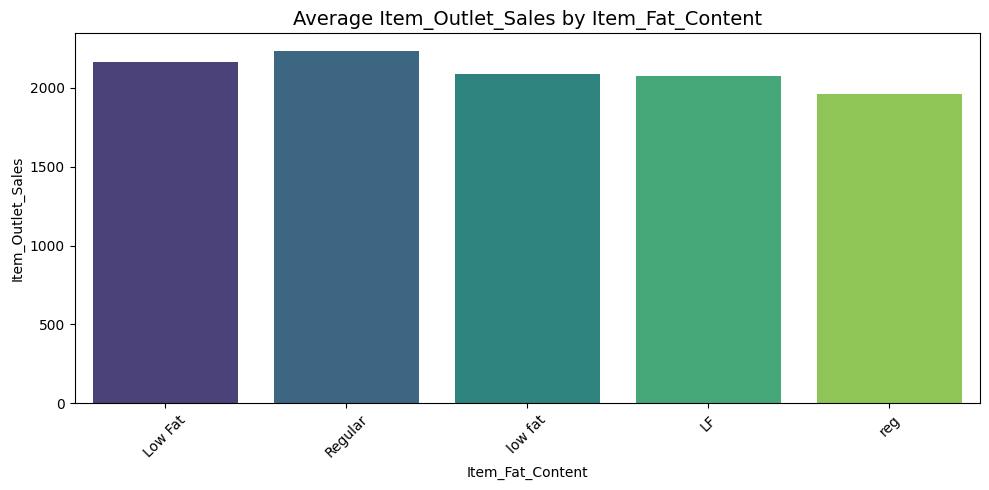

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


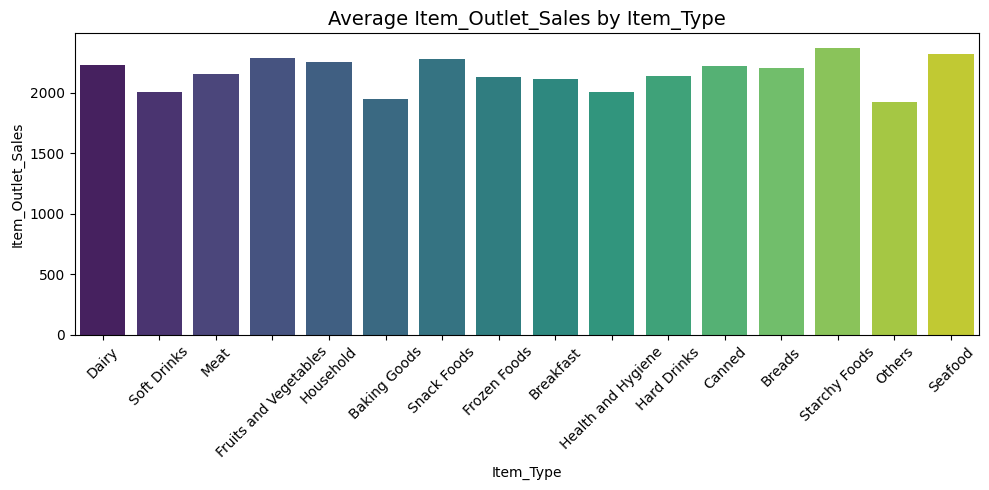

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


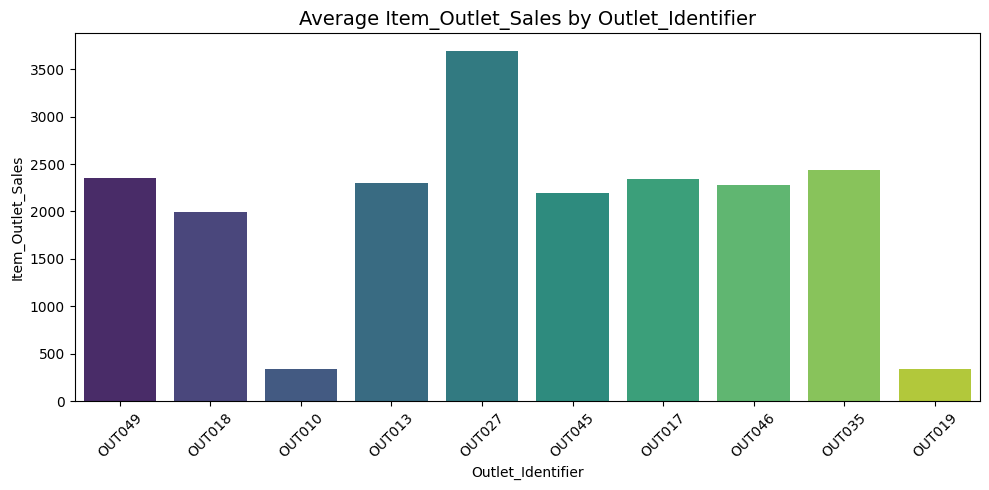

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


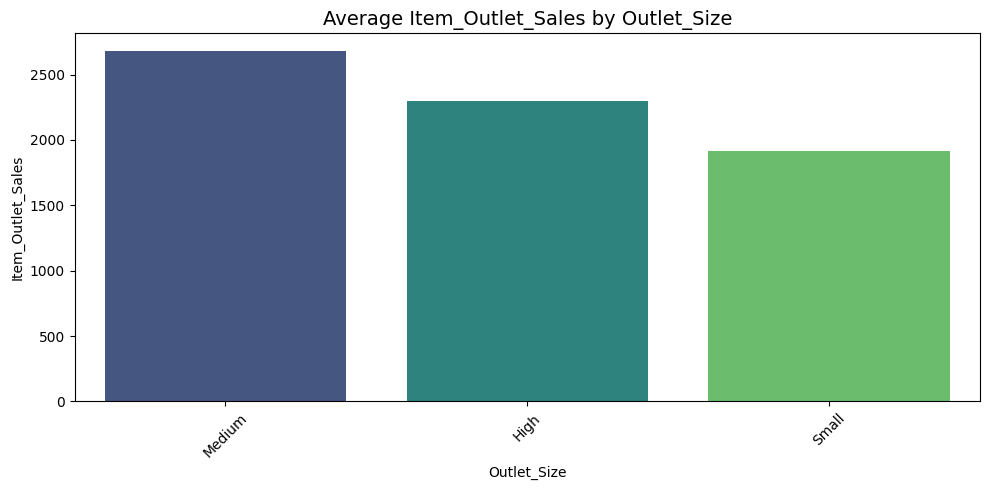

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


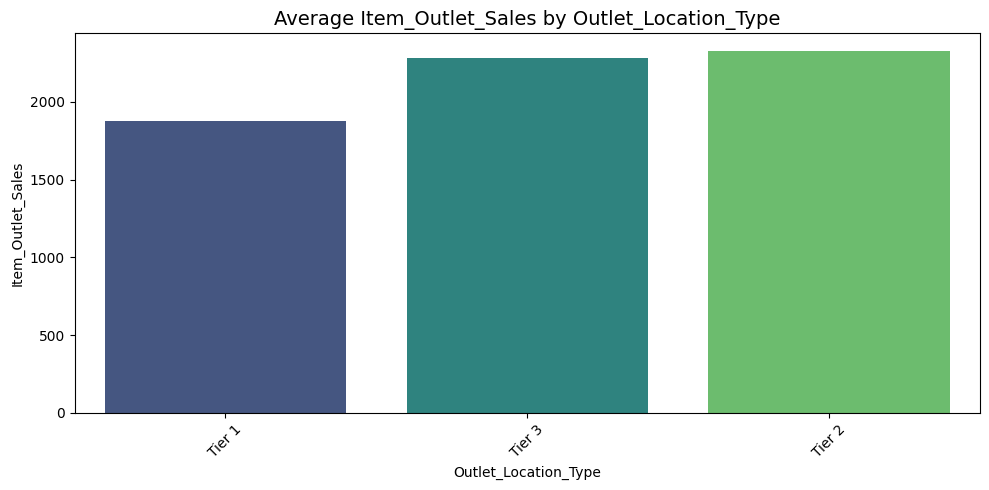

C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
C:\Users\kuria\AppData\Local\Temp\ipykernel_16356\1258990677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')


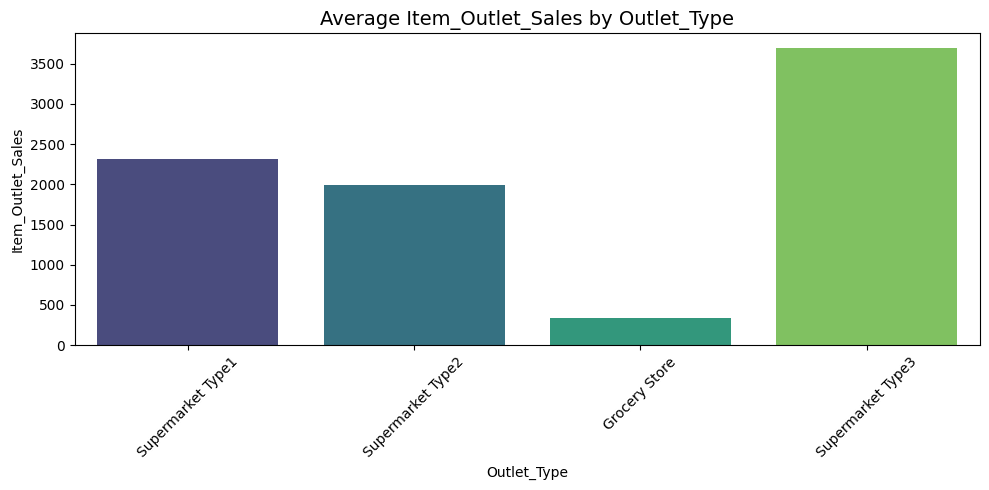

In [ ]:

cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data, estimator='mean', ci=None, palette='viridis')
    plt.title(f'Average Item_Outlet_Sales by {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Observation:

Supermarket Type 3 has significantly higher sales

Outlet OUTO27 has higher sales when compared to other outlets

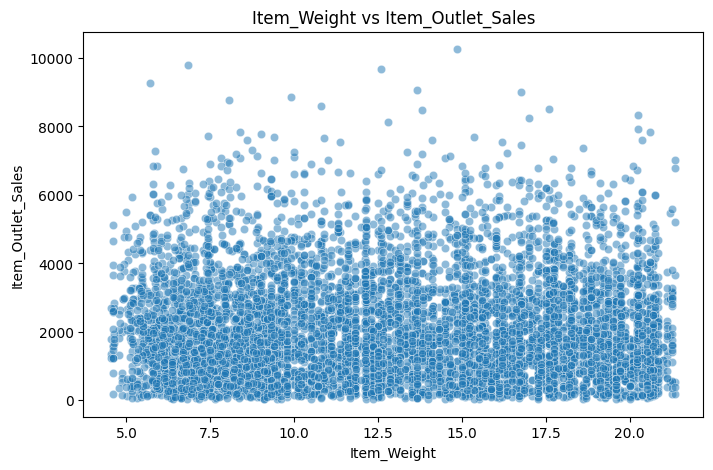

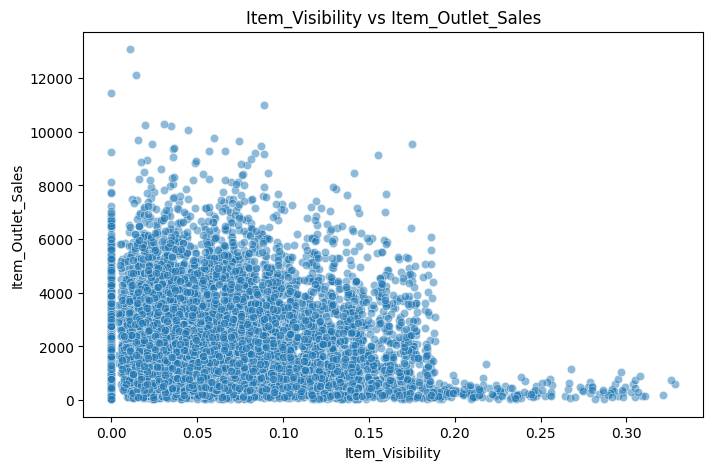

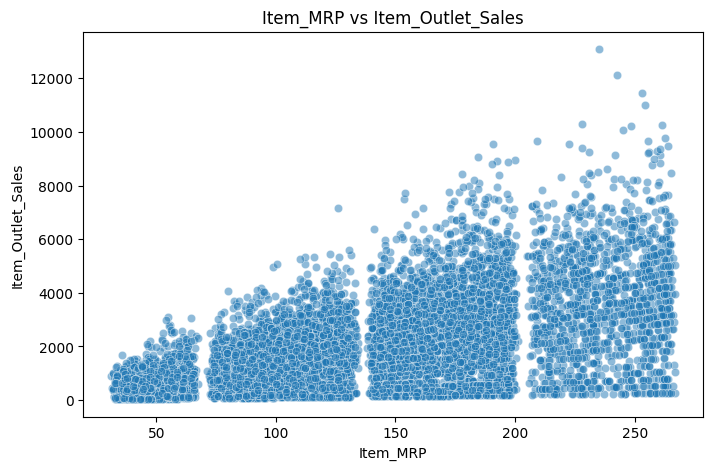

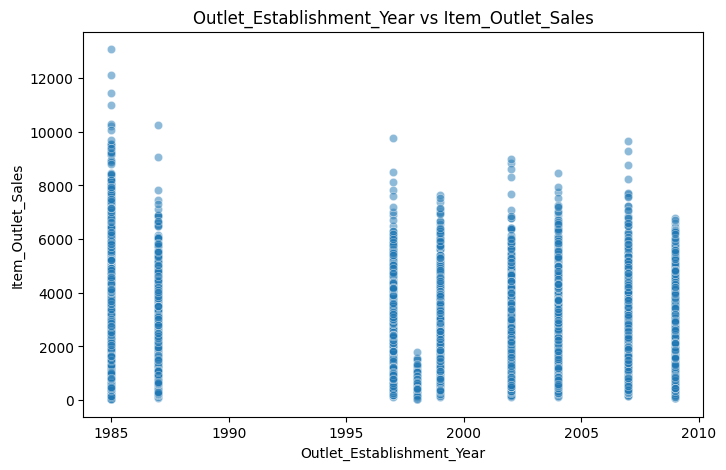

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=train_data, x=col, y='Item_Outlet_Sales', alpha=0.5)
    plt.title(f'{col} vs Item_Outlet_Sales')
    plt.show()


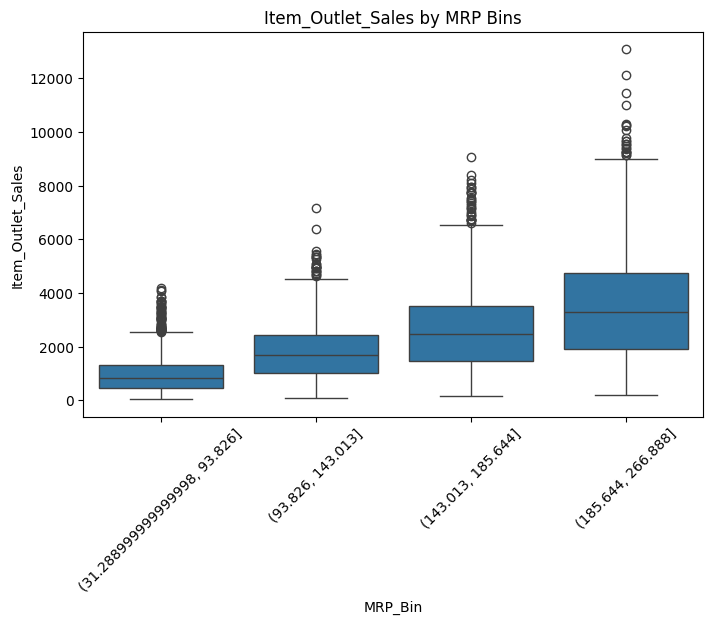

In [54]:
#Bin Item_MRP and plot
train_data['MRP_Bin'] = pd.qcut(train_data['Item_MRP'], q=4)

plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='MRP_Bin', y='Item_Outlet_Sales')
plt.title('Item_Outlet_Sales by MRP Bins')
plt.xticks(rotation=45)
plt.show()


Observation:

Similar to correlation plot above plots also show relation between MRP and Item_Outlet_Sales

# MISSING VALUES _ TREND

In [55]:
missing_weight = train_data[train_data['Item_Weight'].isnull()]
weight_missing_by_type = missing_weight['Item_Type'].value_counts()

print("Missing Item_Weight by Item_Type:")
print(weight_missing_by_type)


Missing Item_Weight by Item_Type:
Item_Type
Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: count, dtype: int64


In [56]:


weight_missing_by_Outlet_Size= missing_weight['Outlet_Size'].value_counts()

print("Missing Item_Weight by Outlet_Size:")
print(weight_missing_by_Outlet_Size)

Missing Item_Weight by Outlet_Size:
Outlet_Size
Medium    935
Small     528
Name: count, dtype: int64


In [57]:


weight_missing_by_Outlet_Type= missing_weight['Outlet_Type'].value_counts()

print("Missing Item_Weight by Outlet_Type:")
print(weight_missing_by_Outlet_Type)

Missing Item_Weight by Outlet_Type:
Outlet_Type
Supermarket Type3    935
Grocery Store        528
Name: count, dtype: int64


In [58]:
missing_size = train_data[train_data['Outlet_Size'].isnull()]
weight_missing_by_type = missing_weight['Item_Type'].value_counts()
size_missing_by_Outlet_Type= missing_weight['Outlet_Type'].value_counts()

print("Missing Outlet_Size by Outlet_Type:")
print(weight_missing_by_Outlet_Type)

Missing Outlet_Size by Outlet_Type:
Outlet_Type
Supermarket Type3    935
Grocery Store        528
Name: count, dtype: int64


Observation:

Both missing vales in Outlet_Size and Item_weight only belong to Superarket Type 3 and Grocery Store

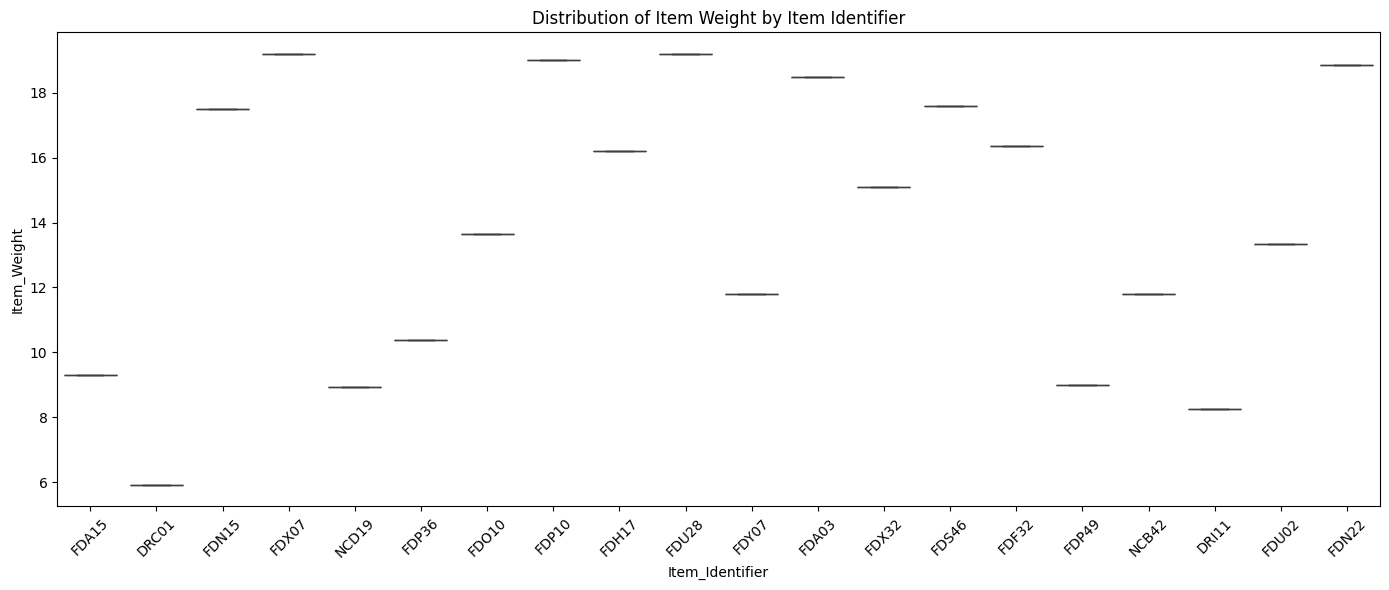

In [61]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_data[train_data['Item_Identifier'].isin(train_data['Item_Identifier'].unique()[:20])], 
            x='Item_Identifier', y='Item_Weight')
plt.xticks(rotation=45)
plt.title('Distribution of Item Weight by Item Identifier')
plt.tight_layout()
plt.show()


Observation:


Item weight is same for same Items

In [ ]:

categorical_cols = train_data.select_dtypes(include='object').columns.tolist()

categorical_cols.append("Outlet_Establishment_Year")

for col in categorical_cols:
    if col != 'Outlet_Size':  
        print(f"\nCrosstab: Outlet_Size vs {col}")
        print(pd.crosstab(train_data['Outlet_Size'], train_data[col]))



Crosstab: Outlet_Size vs Item_Identifier
Item_Identifier  DRA12  DRA24  DRA59  DRB01  DRB13  DRB24  DRB25  DRB48  \
Outlet_Size                                                               
High                 1      1      1      1      1      0      1      1   
Medium               1      2      3      2      1      1      2      2   
Small                1      2      2      0      1      1      1      2   

Item_Identifier  DRC01  DRC12  ...  NCZ05  NCZ06  NCZ17  NCZ18  NCZ29  NCZ30  \
Outlet_Size                    ...                                             
High                 1      0  ...      1      1      0      0      1      1   
Medium               2      1  ...      0      3      2      2      0      2   
Small                1      2  ...      2      2      1      3      1      1   

Item_Identifier  NCZ41  NCZ42  NCZ53  NCZ54  
Outlet_Size                                  
High                 1      1      1      0  
Medium               1      1      3      3

In [2]:
# all Tier 2 are small
# all super market type 3 - Medium
# all grocery store - Small
# all 1987 - HIgh


# Outlet_Establishment_Year  1985  1987  1997  1999  2004  2009
# Outlet_Size                                                  
# High                          0   932     0     0     0     0
# Medium                      935     0     0   930     0   928
# Small                       528     0   930     0   930     0


In [ ]:
# Imputation Logic
def impute_outlet_size(row):
    if pd.isna(row['Outlet_Size']) or row['Outlet_Size'] == 'Missing':
        year = row['Outlet_Establishment_Year']
        otype = row['Outlet_Type']
        loc = row['Outlet_Location_Type']
        
        if year == 1987:
            return 'High'
        elif otype == 'Supermarket Type3':
            return 'Medium'
        elif otype == 'Grocery Store':
            return 'Small'
        elif loc == 'Tier 2':
            return 'Small'
        elif year in [1997, 2004]:
            return 'Small'
        elif year in [1999, 2009]:
            return 'Medium'
        elif year == 1985:
            if otype == 'Supermarket Type1':
                return 'Medium'
            elif otype == 'Grocery Store':
                return 'Small'
    else:
        return row['Outlet_Size']
